In [122]:
import numpy as np
import matplotlib.pyplot as plt

# делаем посев случайных чисел предсказуемым
np.random.seed(12345)

Функция сигмоида - это математическая функция, имеющая форму буквы "S", которая определяется следующей формулой: 

\begin{equation*}
g(z)=\frac{1}{1+e^{-z}}
\end{equation*}

Данную функцию используют в нейронных сетях в качестве [функции активации](https://en.wikipedia.org/wiki/Activation_function). Ниже представлен график функции сигмоида.

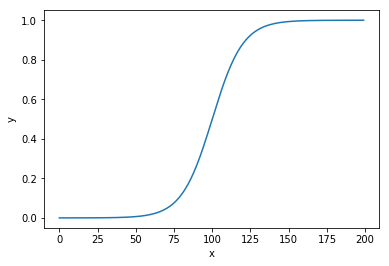

In [123]:
# функция сигмоида
def sigmoid(z):
    a = 1/(1 + np.exp(-z))
    return a

t = np.arange(-10., 10., 0.1)

plt.plot(sigmoid(t))
plt.ylabel("y")
plt.xlabel("x")
plt.show()

В качестве примера рассмотрим нейронную сеть, у которой один входной слой, один скрытый слой и один выходной слой. Входной слой состоит из вектора $\vec{\mathbf{x}}=[x_1, x_2, x_3]$, скрытый слой состоит из нейронов $[h_1, h_2, h_3, h_4]$, а выходной слой из одного нейрона $\hat{y}$.<br><br>

Далее, в качестве примера, определим данные для обучения нейронной сети. На вход нейронной сети будет подаваться обучающая выборка, которая является матрицей $\text{x_train}$ размерности $\text{[nrow x ncol]}$. Допустимые ответы определяются вектором $\text{y_train}$. Для нейронной сети инициализируются матрицы весов скрытого слоя $w_1$ и выходного слоя $w_2$, а также вектора отклоней скрытого слоя $b_1$ и выходного слоя $b_2$.

In [124]:
# количество элементов вектора x
ncol = 3
# обучающая выборка будет состоять из nrow элементов
nrow = 5
# количество нейронов в скрытом слое сети
n_hidden_layer = 4
# количество нейронов в выходном слое сети
n_output = 1

In [125]:
# обучающая матрица, состоящая из nrow строк и ncol столбцов, элементы матрицы - случайные числа
x_train = (np.random.random((nrow, ncol)))

# результат
y_train = np.array([1, 0, 1, 1, 1])

# веса скрытоко слоя сети
w1 = np.random.random((n_hidden_layer, ncol))

# отклонения скрытого слоя сети
#b1 = np.random.random((n_hidden_layer, 1))
b1 = np.zeros((n_hidden_layer, n_output))

# веса выходного слоя сети
w2 = np.random.random((n_output, n_hidden_layer))

# отклонения выходного слоя сети
b2 = np.zeros((n_output, n_output))

print("Обучающая выборка x_train:")
print(x_train)
print("\nДопустимые ответы y_train:")
print(y_train)
print("\nМатрица весов скрытого слоя w1:")
print(w1)
print("\nОтклонения скрытого слоя b1:")
print(b1)
print("\nМатрица весов выходного слоя w2:")
print(w2)
print("\nОтклонения выходного слоя b2:")
print(b2)

Обучающая выборка x_train:
[[ 0.92961609  0.31637555  0.18391881]
 [ 0.20456028  0.56772503  0.5955447 ]
 [ 0.96451452  0.6531771   0.74890664]
 [ 0.65356987  0.74771481  0.96130674]
 [ 0.0083883   0.10644438  0.29870371]]

Допустимые ответы y_train:
[1 0 1 1 1]

Матрица весов скрытого слоя w1:
[[ 0.65641118  0.80981255  0.87217591]
 [ 0.9646476   0.72368535  0.64247533]
 [ 0.71745362  0.46759901  0.32558468]
 [ 0.43964461  0.72968908  0.99401459]]

Отклонения скрытого слоя b1:
[[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]

Матрица весов выходного слоя w2:
[[ 0.67687371  0.79082252  0.17091426  0.02684928]]

Отклонения выходного слоя b2:
[[ 0.]]


Опредилив обучающий данные и инициализировав переменные нейронные сети можно начинать ее обучение. Выполним один шаг прямого распространения для нашей нейронной сети. Для этого необходимо выполнить расчет по следующим уравнениям:<br><br>

\begin{equation*}
z_1=w_1 x_{train}^T+b_1
\end{equation*}

\begin{equation*}
a_1=g(z_1)
\end{equation*}

\begin{equation*}
z_2=w_2 a_1+b_2 
\end{equation*}

\begin{equation*}
\hat{y}=g(z_2)
\end{equation*}
<br><br>
Здесь функция активации $\sigma$ является функцией сигмоида $g(z)$, определенного выше.

In [126]:
# Прямое распространение
print("Скрытый слой:")
z1 = np.dot(w1, x_train.T) + b1
print(z1)
print("\nАктивация скрытого слоя:")
a1 = sigmoid(z1)
print(a1)
print("\nВыходной слой:")
z2 = np.dot(w2, a1) + b2
print(z2)
print("\nАктивация выходного слоя:")
y_hat = a2 = sigmoid(z2)
print(a2)

Скрытый слой:
[[ 1.02682485  1.11344625  1.81524746  1.87294799  0.35222835]
 [ 1.24387158  0.99080564  1.88426535  1.78919072  0.27703375]
 [ 0.87477447  0.6061304   1.24125192  1.13152352  0.15304485]
 [ 0.82237447  1.0961767   1.64508392  1.78849072  0.37827502]]

Активация скрытого слоя:
[[ 0.73629986  0.75277104  0.85999488  0.86679902  0.58715784]
 [ 0.7762372   0.72924702  0.86810029  0.85682803  0.56881886]
 [ 0.70573819  0.64705759  0.77578185  0.75611995  0.53818671]
 [ 0.69474014  0.74954305  0.83822552  0.85674213  0.59345699]]

Выходной слой:
[[ 1.25152187  1.21695195  1.42371911  1.41654695  0.95518414]]

Активация выходного слоя:
[[ 0.77756319  0.7715267   0.80592079  0.80479652  0.72215656]]


Теперь, когда получен первый результат работы нейронной сети, можно выполнить расчет значения функции ошибки для результата работы нейронной сети $\hat{y}$ и допустимых ответов $\text{y_train}$. Определим в качестве функции затрат функцию логистической потери (или потери перекрестной энтропии) следующего вида:<br>
\begin{equation*}
Cost=-\frac{1}{n}\sum_{i=1}^nL_i=-\frac{1}{n}\sum_{i=1}^n\left(y_ilog(\hat{y_i})+(1-y_i)log(1-\hat{y_i})\right)
\end{equation*}
Далее выполним расчет значения функции затрат.

In [127]:
# функция затрат
cost = (1./nrow) * (-np.dot(y_train, np.log(y_hat).T) - np.dot(1 - y_train, np.log(1 - y_hat).T))
print("Значение функции затрат:")
print(cost)

Значение функции затрат:
[ 0.49727505]


Для минимизации функции затрат методом [градиентного спуска](https://en.wikipedia.org/wiki/Gradient_descent) необходимо выполнить расчет следующих производных функций.
<br><br>
\begin{equation*}
\frac{\partial{L}}{\partial{w_2}}=\frac{\partial{L}}{\partial{\hat{y}}}\frac{\partial{\hat{y}}}{\partial{z_2}}\frac{\partial{z_2}}{\partial{w_2}}
\end{equation*}<br>
\begin{equation*}
\frac{\partial{L}}{\partial{b_2}}=\frac{\partial{L}}{\partial{\hat{y}}}\frac{\partial{\hat{y}}}{\partial{z_2}}\frac{\partial{z_2}}{\partial{b_2}}
\end{equation*}<br>
\begin{equation*}
\frac{\partial{L}}{\partial{w_1}}=\frac{\partial{L}}{\partial{\hat{y}}}\frac{\partial{\hat{y}}}{\partial{z_2}}\frac{\partial{z_2}}{\partial{a_1}}\frac{\partial{a_1}}{\partial{z_1}}\frac{\partial{z_1}}{\partial{w_1}}
\end{equation*}<br>
\begin{equation*}
\frac{\partial{L}}{\partial{b_1}}=\frac{\partial{L}}{\partial{\hat{y}}}\frac{\partial{\hat{y}}}{\partial{z_2}}\frac{\partial{z_2}}{\partial{a_1}}\frac{\partial{a_1}}{\partial{z_1}}\frac{\partial{z_1}}{\partial{b_1}}
\end{equation*}<br>

Для решения этих уравнений определим следующие производный функций:<br><br>
\begin{equation*}
\frac{\partial{L}}{\partial{\hat{y}}}=-\left(\frac{y}{\hat{y}}-\frac{1-y}{1-\hat{y}}\right )=\frac{\hat{y}-y}{\hat{y}*(1-y)}
\end{equation*}<br>
\begin{equation*}
\frac{\partial{\hat{y}}}{\partial{z_2}}=\frac{\partial{g(z_2)}}{\partial{z_2}}=\frac{1}{1+e^{-z_2}}*\left(1-\frac{1}{1+e^{-z_2}}\right )=g(z_2)*\left(1-g(z_2)\right)=\hat{y}*\left(1-\hat{y}\right)
\end{equation*}<br>
\begin{equation*}
\frac{\partial{z_2}}{\partial{w_2}}=\frac{\partial{\left(w_2 a_1+b_2\right)}}{\partial{w_2}}=a_1
\end{equation*}<br>
\begin{equation*}
\frac{\partial{z_2}}{\partial{b_2}}=\frac{\partial{\left(w_2 a_1+b_2\right)}}{\partial{b_2}}=1
\end{equation*}<br>
\begin{equation*}
\frac{\partial{z_2}}{\partial{a_1}}=\frac{\partial{\left(w_2 a_1+b_2\right)}}{\partial{a_1}}=w_2
\end{equation*}<br>
\begin{equation*}
\frac{\partial{a_1}}{\partial{z_1}}=\frac{\partial{\sigma{(z_1)}}}{\partial{z_1}}=\frac{1}{1+e^{-z_1}}*\left(1-\frac{1}{1+e^{-z_1}}\right )=\sigma{(z_1)}*(1-\sigma{(z_1)})=a_1*\left(1-a_1\right)
\end{equation*}<br>
\begin{equation*}
\frac{\partial{z_1}}{\partial{w_1}}=\frac{\partial{\left(w_1x_{train}^T+b_1\right)}}{\partial{w_1}}=x_{train}^T
\end{equation*}<br>
\begin{equation*}
\frac{\partial{z_1}}{\partial{b_1}}=\frac{\partial{\left(w_1x_{train}^T+b_1\right)}}{\partial{b_1}}=1
\end{equation*}<br>
\begin{equation*}
dz_2=\frac{\partial{L}}{\partial{\hat{y}}}\frac{\partial{\hat{y}}}{\partial{z_2}}=\frac{\hat{y}-y}{\hat{y}(1-y)}*\hat{y}\left(1-\hat{y}\right)=\hat{y}-y
\end{equation*}<br>
\begin{equation*}
dz_1=\frac{\partial{L}}{\partial{\hat{y}}}\frac{\partial{\hat{y}}}{\partial{z_2}}\frac{\partial{z_2}}{\partial{a_1}}\frac{\partial{a_1}}{\partial{z_1}}=\left(dz_2w_2^T\right)*\left(a_1*\left(1-a_1\right)\right)
\end{equation*}

<br><br>
Отсюда:
\begin{equation*}
\frac{\partial{Cost}}{\partial{w_2}}=\frac{1}{n}\left(dz_2a_1^T\right)
\end{equation*}<br>
\begin{equation*}
\frac{\partial{Cost}}{\partial{b_2}}=\frac{1}{n}\sum_{i=1}^n\left(dz_{2i}\right)
\end{equation*}<br>
\begin{equation*}
\frac{\partial{Cost}}{\partial{w_1}}=\frac{1}{n}\left(dz_1x_{train}\right)
\end{equation*}<br>
\begin{equation*}
\frac{\partial{L}}{\partial{b_1}}=\frac{1}{n}\sum_{i=1}^n\left(dz_{1i}\right)
\end{equation*}<br>


In [132]:
# обратное распространение
# произодная функции стоимости
cost_derivative = - (np.divide(y_train, y_hat) - np.divide(1 - y_train, 1 - y_hat))
print("Производная функции стоимости:")
print(cost_derivative)

Производная функции стоимости:
[[-1.28606911  4.37687914 -1.24081673 -1.24255011 -1.38474129]]


In [133]:
dz2 = cost_derivative * y_hat * (1 - y_hat)
print(z2)

[[ 1.25152187  1.21695195  1.42371911  1.41654695  0.95518414]]


In [134]:
dw2 = (1./nrow) * np.dot(dz2, a1.T)
db2 = (1./nrow) * np.sum(dz2, axis=1, keepdims=True)
da1 = np.dot(w2.T,dz2)
print("d(Cost)/d(w2):")
print(dw2)
print("d(Cost)/d(b2):")
print(db2)

d(Cost)/d(w2):
[[-0.0164489  -0.02076176 -0.02109039 -0.01421053]]
d(Cost)/d(b2):
[[-0.02360725]]


In [135]:
dz1 = da1 * a1 * (1 - a1)

dw1 = (1./nrow) * np.dot(dz1, x_train)
db1 = (1./nrow) * np.sum(dz1, axis=1, keepdims=True)
da0 = np.dot(w1.T,z1)

print("d(Cost)/d(w1):")
print(dw1)
print("d(Cost)/d(b1):")
print(db1)

d(Cost)/d(w1):
[[ -6.58065662e-03   3.86756931e-03   2.47531655e-03]
 [ -6.70789919e-03   5.47042307e-03   3.73248917e-03]
 [ -2.17286412e-03   9.94745525e-04   5.44339470e-04]
 [ -2.99798942e-04   1.34588181e-04   7.95641160e-05]]
d(Cost)/d(b1):
[[ -1.74071177e-03]
 [ -9.72444693e-05]
 [ -3.01078239e-04]
 [ -1.05498568e-04]]


Следующий шаг в обучении нашей нейронное сети - это обновление матриц весов $w_2$, $w_1$ и векторов отклонений $b_2$, $b_1$ в соответствии с коэффициентом обучения.

In [159]:
# определим коэффициент обучения
learning_rate = 0.5

# обновляем значения весов
w1_step1 = w1 - learning_rate * dw1
b1_step1 = b1 - learning_rate * db1
w2_step1 = w2 - learning_rate * dw2
b2_step1 = b2 - learning_rate * db2

In [160]:
# Прямое распространение
print("Скрытый слой [Шаг1]:")
z1_step1 = np.dot(w1_step1, x_train.T) + b1_step1
print(z1_step1)
print("\nАктивация скрытого слоя [Шаг1]:")
a1_step1 = sigmoid(z1_step1)
print(a1_step1)
print("\nВыходной слой [Шаг1]:")
z2_step1 = np.dot(w2_step1, a1) + b2_step1
print(z2)
print("\nАктивация выходного слоя [Шаг1]:")
y_hat_step1 = a2_step1 = sigmoid(z2_step1)
print(y_hat_step1)

Скрытый слой [Шаг1]:
[[ 1.02991452  1.11315474  1.81710139  1.87333312  0.35255077]
 [ 1.2458295   0.98887607  1.88436468  1.78759219  0.27626191]
 [ 0.87572756  0.60605872  1.24192164  1.13175058  0.15307026]
 [ 0.82253796  1.09619822  1.64520751  1.78855288  0.37830998]]

Активация скрытого слоя [Шаг1]:
[[ 0.73689932  0.75271679  0.86021795  0.86684348  0.587236  ]
 [ 0.77657709  0.72886587  0.86811166  0.85663182  0.56862954]
 [ 0.70593609  0.64704122  0.77589833  0.75616182  0.53819302]
 [ 0.69477481  0.74954709  0.83824228  0.85674976  0.59346543]]

Выходной слой [Шаг1]:
[[ 1.25152187  1.21695195  1.42371911  1.41654695  0.95518414]]

Активация выходного слоя [Шаг1]:
[[ 0.78411632  0.77810652  0.81240962  0.81129319  0.72861631]]


In [161]:
# функция затрат
cost_step1 = (1./nrow) * (-np.dot(y_train, np.log(y_hat_step1).T) - np.dot(1 - y_train, np.log(1 - y_hat_step1).T))
print("Значение функции затрат [Шаг1]:")
print(cost_step1)

Значение функции затрат [Шаг1]:
[ 0.49644802]


In [162]:
print("Уменьшение значения функции затрат:")
print(cost - cost_step1)

Уменьшение значения функции затрат:
[ 0.00082703]


В следующем примере будет полностью реализован градиентный спуск.